In [8]:
import pandas as pd

#생선 데이터를 읽고, fish_data에 저장
fish = pd.read_csv('https://bit.ly/fish_csv_data')

#'Species' 열을 제외한 특성을 fish_input에 저장
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [3]:
#'Species' 열을 타깃으로 저장
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

#훈련/테스트 분할
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

#shape 출력
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


In [6]:
from sklearn.preprocessing import StandardScaler

#훈련/테스트 표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

#확률적 경사하강법 분류모델 생성 및 훈련(에포크 30)
sc = SGDClassifier(loss='log_loss', max_iter=30, random_state=42)
sc.fit(train_scaled, train_target)

#훈련/테스트 점수 출력
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8739495798319328
0.8


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
#1에포크씩 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8991596638655462
0.925


In [10]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

#500 에포크 훈련
for _ in range(500):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

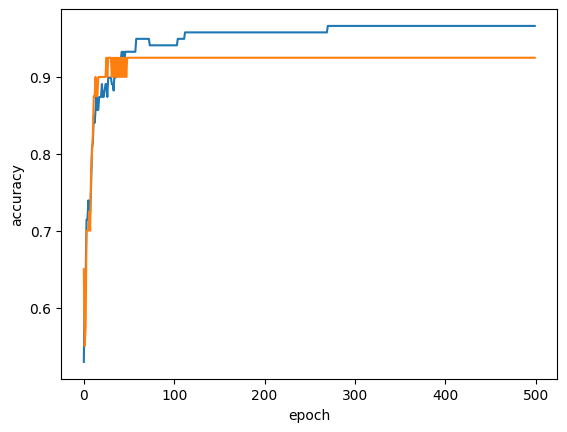

In [11]:
#훈련/테스트 plot 그래프
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [12]:
#에포크 100 모델 생성, 훈련/테스트 점수 출력
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
